In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [5]:
df.target.value_counts().index

Int64Index([1, 0], dtype='int64')

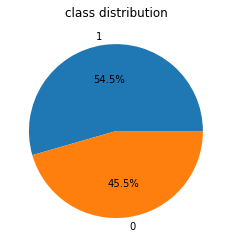

In [6]:
plt.pie(df.target.value_counts().values , labels=df.target.value_counts().index,autopct='%1.1f%%')
plt.title('class distribution' , loc='center')
plt.show()

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
print('*'*10,'\033[1m'+'"Dataset Information",'+'\033[1m' '*'*10)
print(df.info())

********** "Dataset Information",**********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [9]:
def cat_feature_plot(f_name):
    
    feature_value=df[f_name].value_counts().values
    feature_index=df[f_name].value_counts().index
    
    plt.figure(figsize=(15,5))
    plt.style.use('seaborn-dark-palette')
    plt.suptitle('*'*10+'distribution of categorical feature : {}'.format(f_name)+'*'*10,fontweight='heavy' )
    
    ##### pie chart ####
    plt.subplot(1,2,1)
    plt.pie(feature_value , labels=feature_index,autopct='%1.1f%%')
    plt.title('pie chart')
    
    ###### bar plot  ####
    plt.subplot(1,2,2)
    plt.bar(x=feature_index,height=feature_value,color=['blue','green','red','pink','yellow'])
    plt.xticks(feature_index)
    plt.title('bar chart')

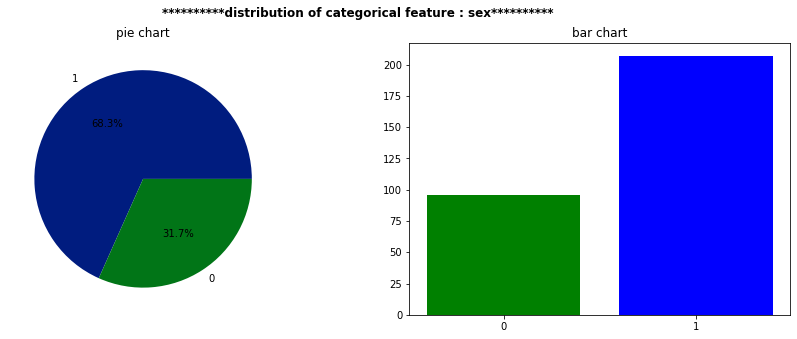

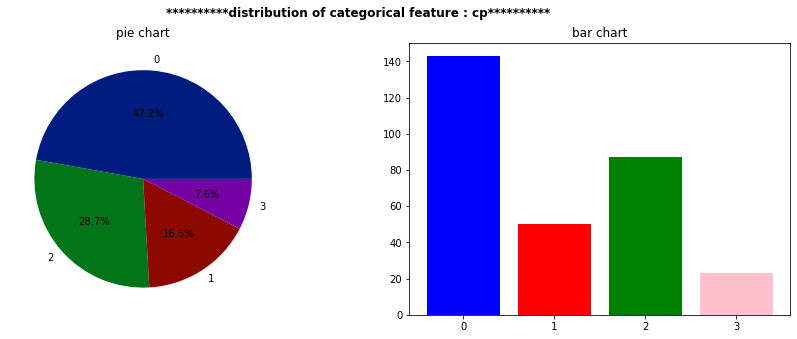

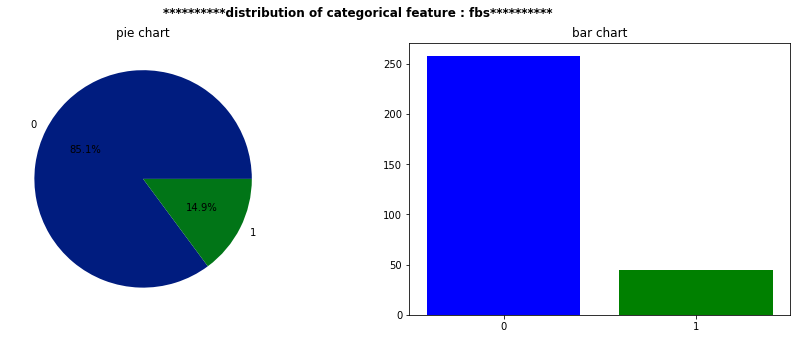

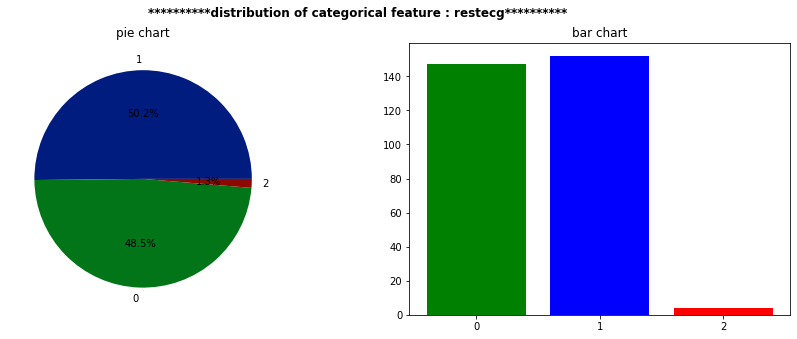

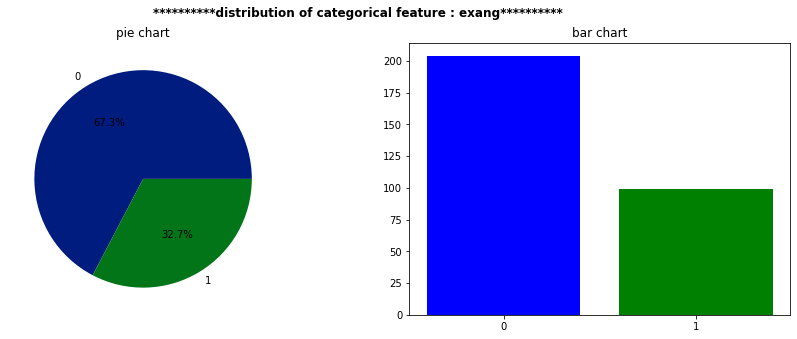

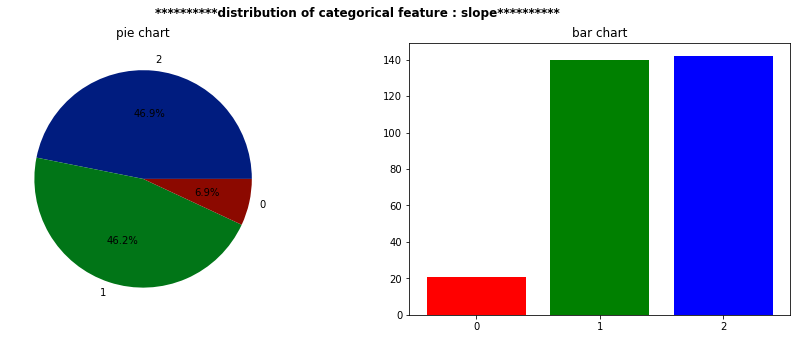

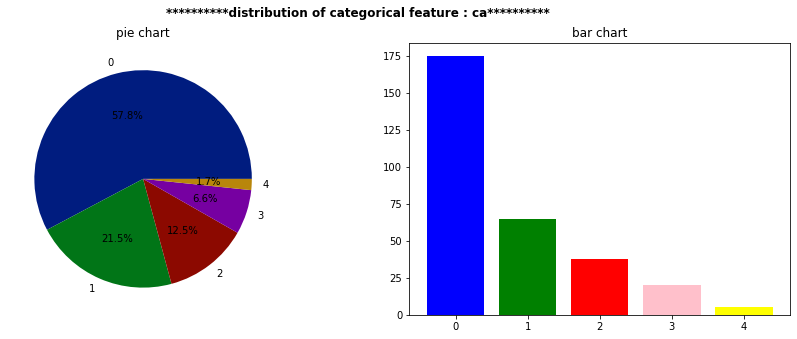

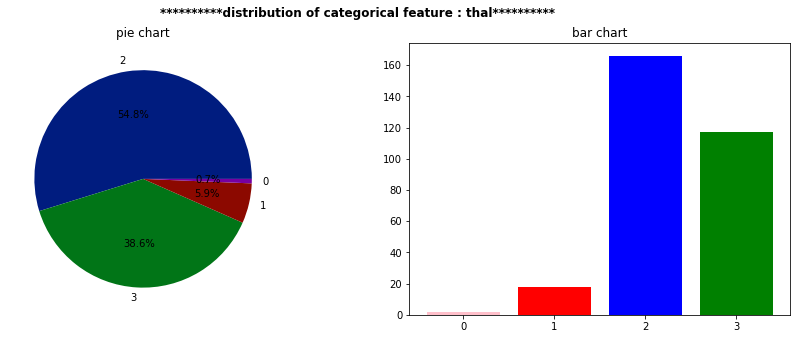

In [10]:
cat_features=['sex','cp','fbs','restecg','exang','slope' ,'ca','thal' ]
list(map(cat_feature_plot,cat_features))

df.to_csv('cat_features.csv')

In [11]:
numerical_features=['age','trestbps', 'chol' , 'thalach','oldpeak']
df[numerical_features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [12]:
def plot_numerical_dist(f_name):
    plt.figure(figsize=(15,5))
    plt.suptitle('*'*10+'distribution of numerical feature : {}'.format(f_name)+'*'*10 , fontweight='heavy')
    plt.style.use('seaborn-dark-palette')
    plt.subplot(1,2,1)
    sns.histplot(data=df,x=f_name , kde=True )
    
    plt.subplot(1,2,2)
    sns.boxenplot(data=df , x=f_name,linewidth=1.5)

[None, None, None, None, None]

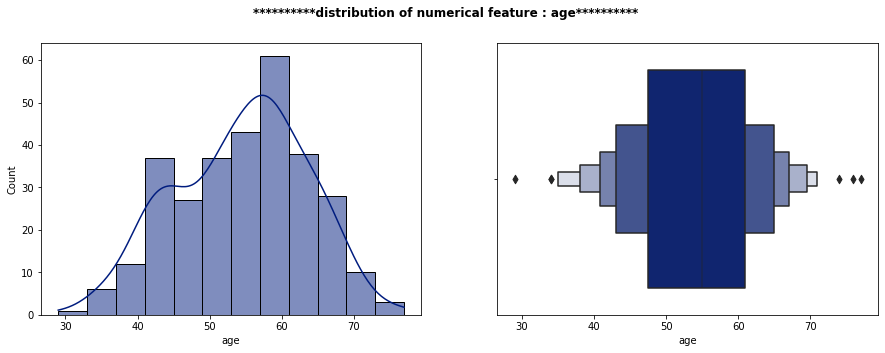

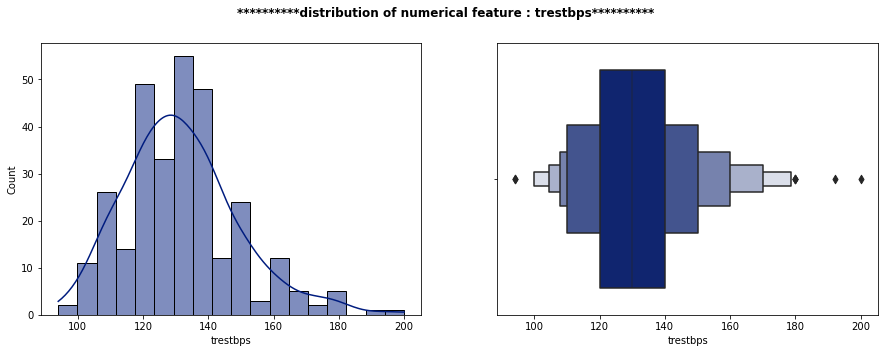

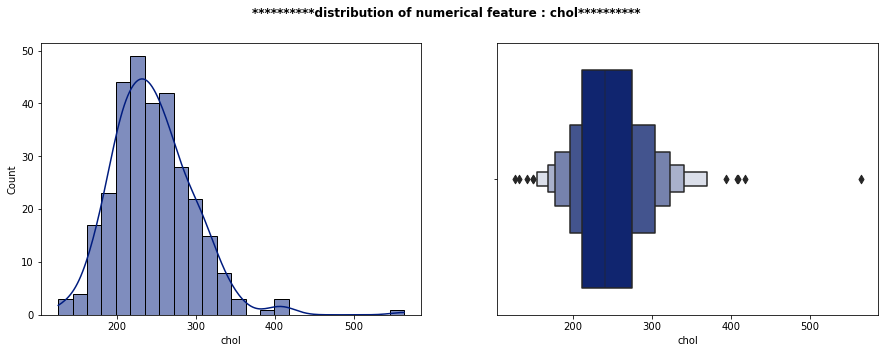

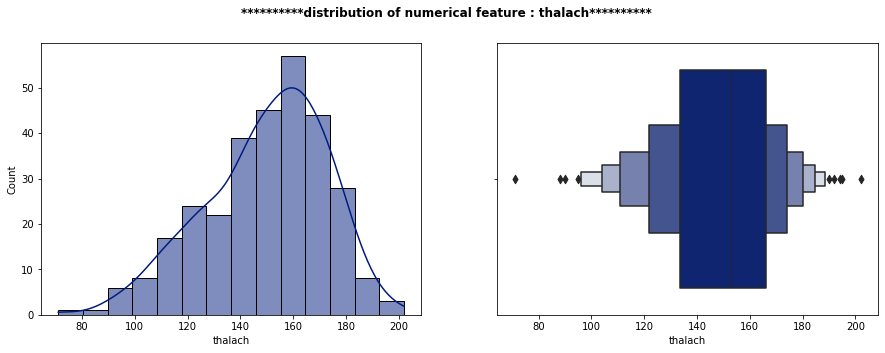

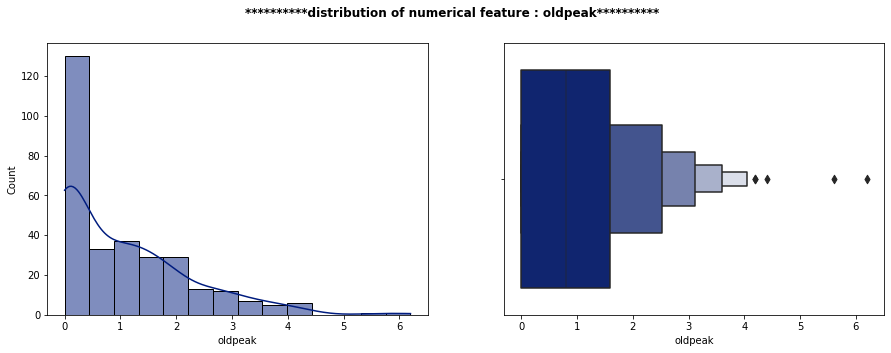

In [13]:
list(map(plot_numerical_dist,numerical_features))

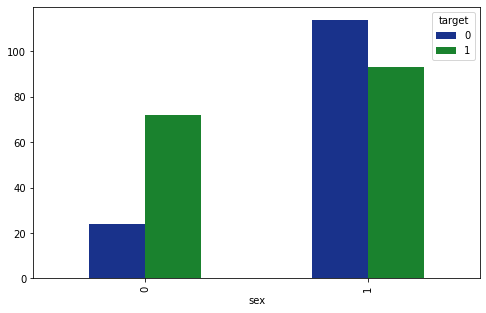

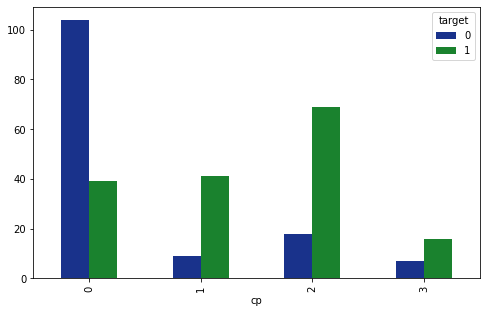

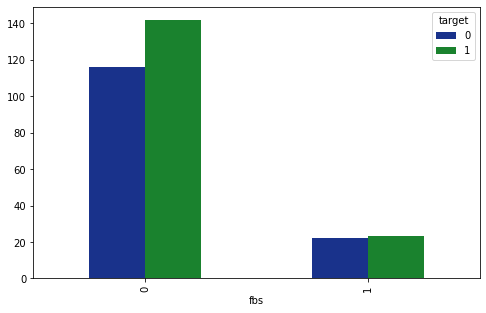

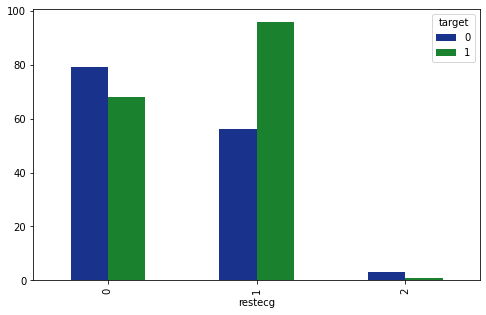

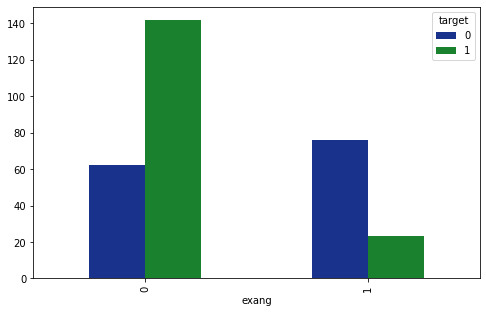

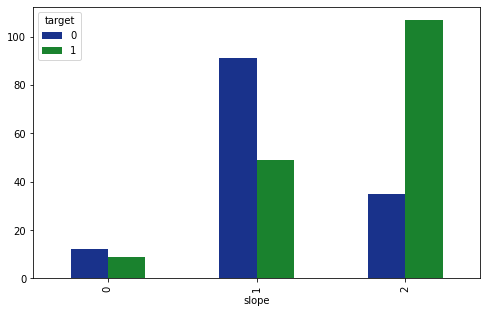

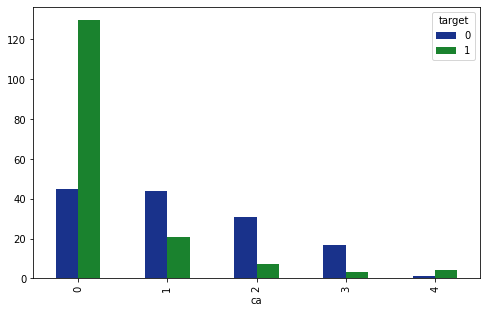

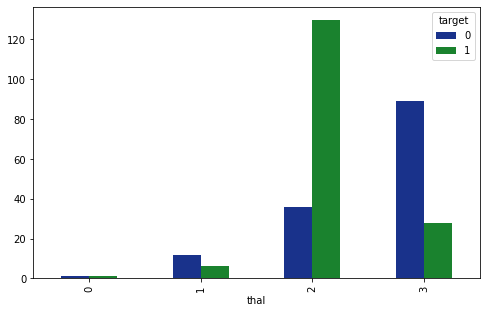

In [14]:
for col in cat_features :
    pd.crosstab(df[col], df.target).plot(kind='bar', figsize=(8, 5), alpha=0.90)

In [15]:
numericalToTarget=numerical_features.append('target')

<AxesSubplot:>

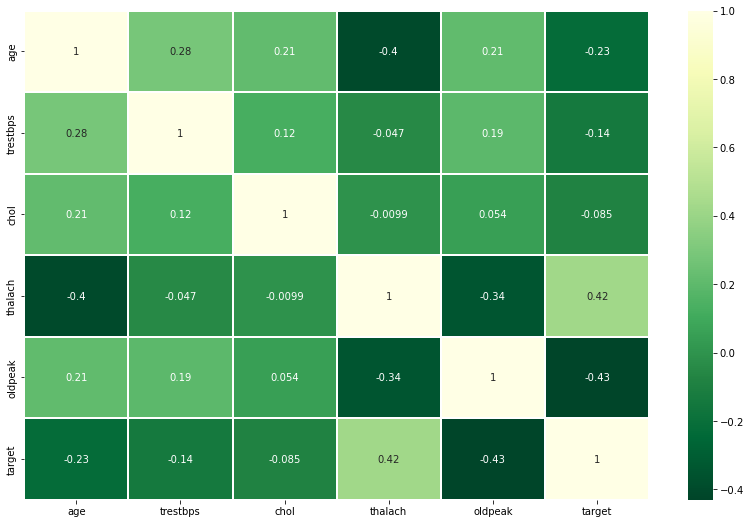

In [16]:
plt.figure(figsize=(14, 9))
sns.heatmap(df[numerical_features].corr(),
            annot=True,cmap='YlGn_r', linewidths=0.1)

In [17]:
cp = pd.get_dummies(df['cp'], prefix='cp')
restecg = pd.get_dummies(df['restecg'], prefix='restecg')
slope = pd.get_dummies(df['slope'], prefix='slope')
ca = pd.get_dummies(df['ca'], prefix='ca')
thal = pd.get_dummies(df['thal'], prefix='thal')

In [18]:
df.drop(columns=['cp','restecg', 'thal','ca', 'slope'], inplace=True)
frames = [df, cp,restecg, thal,ca, slope]
df = pd.concat(frames, axis = 1)

In [19]:
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_0,...,thal_2,thal_3,ca_0,ca_1,ca_2,ca_3,ca_4,slope_0,slope_1,slope_2
0,63,1,145,233,1,150,0,2.3,1,0,...,0,0,1,0,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,1,0,...,1,0,1,0,0,0,0,1,0,0
2,41,0,130,204,0,172,0,1.4,1,0,...,1,0,1,0,0,0,0,0,0,1
3,56,1,120,236,0,178,0,0.8,1,0,...,1,0,1,0,0,0,0,0,0,1
4,57,0,120,354,0,163,1,0.6,1,1,...,1,0,1,0,0,0,0,0,0,1


In [20]:
X=df.drop(columns='target')
y=df['target']

In [21]:
X.shape

(303, 27)

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings; warnings.simplefilter('ignore')
%matplotlib inline
from sklearn.svm import SVC
from yellowbrick.contrib.wrapper import wrap
from sklearn.naive_bayes import GaussianNB
from matplotlib.collections import PathCollection
from statsmodels.graphics.gofplots import qqplot

In [25]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state= 20)

In [26]:
scaler = StandardScaler()

In [27]:
X_train = scaler.fit_transform(X_train)

In [28]:
X_train.shape

(242, 27)

In [29]:
X_test = scaler.fit_transform(X_test)

.:. Logistic Regression Accuracy: 78.69% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.71      0.74      0.72        23
           1       0.84      0.82      0.83        38

    accuracy                           0.79        61
   macro avg       0.77      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61


.: Performance Evaluation
**************************


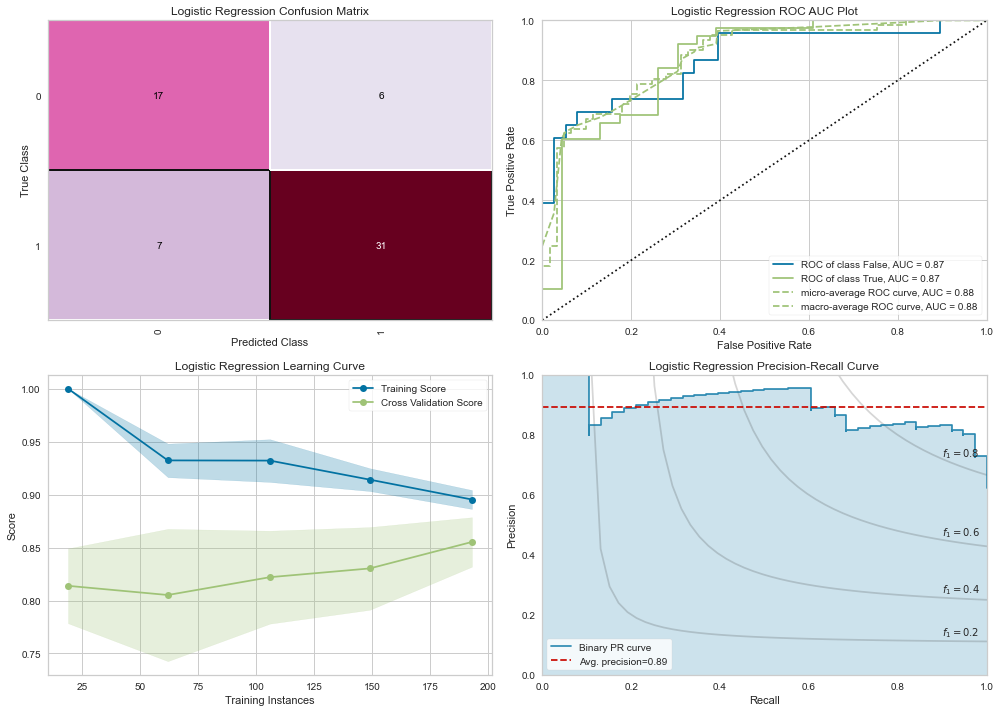

In [30]:
#LogisticRegression 

LRclassifier = LogisticRegression(max_iter=1000, random_state=1, solver='liblinear', penalty='l1')
LRclassifier.fit(X_train, y_train)

y_pred_LR = LRclassifier.predict(X_test)

# --- LR Accuracy ---
LRAcc = accuracy_score(y_pred_LR, y_test)
print('.:. Logistic Regression Accuracy:'+'\033[1m {:.2f}%'.format(LRAcc*100)+' .:.')

# --- LR Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_LR))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- LR Confusion Matrix ---
logmatrix = ConfusionMatrix(LRclassifier, ax=ax1, cmap='PuRd',
                            title='Logistic Regression Confusion Matrix')
logmatrix.fit(X_train, y_train)
logmatrix.score(X_test, y_test)
logmatrix.finalize()

# --- LR ROC AUC ---
logrocauc = ROCAUC(LRclassifier, classes=['False', 'True'], ax=ax2,
                   title='Logistic Regression ROC AUC Plot')
logrocauc.fit(X_train, y_train)
logrocauc.score(X_test, y_test)
logrocauc.finalize()

# --- LR Learning Curve ---
loglc = LearningCurve(LRclassifier, ax=ax3, title='Logistic Regression Learning Curve')
loglc.fit(X_train, y_train)
loglc.finalize()

# --- LR Precision Recall Curve ---
logcurve = PrecisionRecallCurve(LRclassifier, ax=ax4, ap_score=True, iso_f1_curves=True,
                                title='Logistic Regression Precision-Recall Curve')
logcurve.fit(X_train, y_train)
logcurve.score(X_test, y_test)
logcurve.finalize()

plt.tight_layout();


.:. K-Nearest Neighbour Accuracy: 78.69% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.69      0.78      0.73        23
           1       0.86      0.79      0.82        38

    accuracy                           0.79        61
   macro avg       0.77      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61


.: Performance Evaluation
**************************


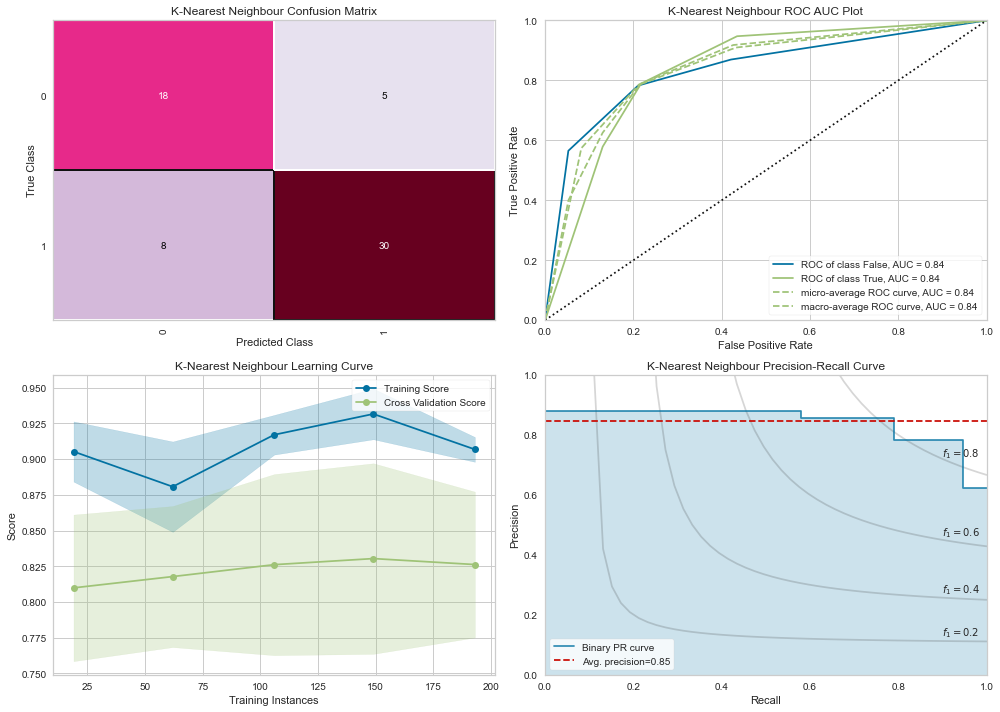

In [31]:
# --- Applying KNN ---
KNNClassifier = KNeighborsClassifier(n_neighbors=3)
KNNClassifier.fit(X_train, y_train)

y_pred_KNN = KNNClassifier.predict(X_test)
# --- KNN Accuracy ---
KNNAcc = accuracy_score(y_pred_KNN, y_test)
print('.:. K-Nearest Neighbour Accuracy:'+'\033[1m {:.2f}%'.format(KNNAcc*100)+' .:.')

# --- KNN Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_KNN))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- KNN Confusion Matrix ---
knnmatrix = ConfusionMatrix(KNNClassifier, ax=ax1, cmap='PuRd',
                            title='K-Nearest Neighbour Confusion Matrix')
knnmatrix.fit(X_train, y_train)
knnmatrix.score(X_test, y_test)
knnmatrix.finalize()

# --- KNN ROC AUC ---
knnrocauc = ROCAUC(KNNClassifier, classes=['False', 'True'], ax=ax2,
                   title='K-Nearest Neighbour ROC AUC Plot')
knnrocauc.fit(X_train, y_train)
knnrocauc.score(X_test, y_test)
knnrocauc.finalize()

# --- KNN Learning Curve ---
knnlc = LearningCurve(KNNClassifier, ax=ax3, title='K-Nearest Neighbour Learning Curve')
knnlc.fit(X_train, y_train)
knnlc.finalize()

# --- KNN Precision Recall Curve ---
knncurve = PrecisionRecallCurve(KNNClassifier, ax=ax4, ap_score=True, iso_f1_curves=True,
                                 title='K-Nearest Neighbour Precision-Recall Curve')
knncurve.fit(X_train, y_train)
knncurve.score(X_test, y_test)
knncurve.finalize()

plt.tight_layout();

.:. Support Vector Machine Accuracy: 81.97% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.75      0.78      0.77        23
           1       0.86      0.84      0.85        38

    accuracy                           0.82        61
   macro avg       0.81      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61


.: Performance Evaluation
**************************


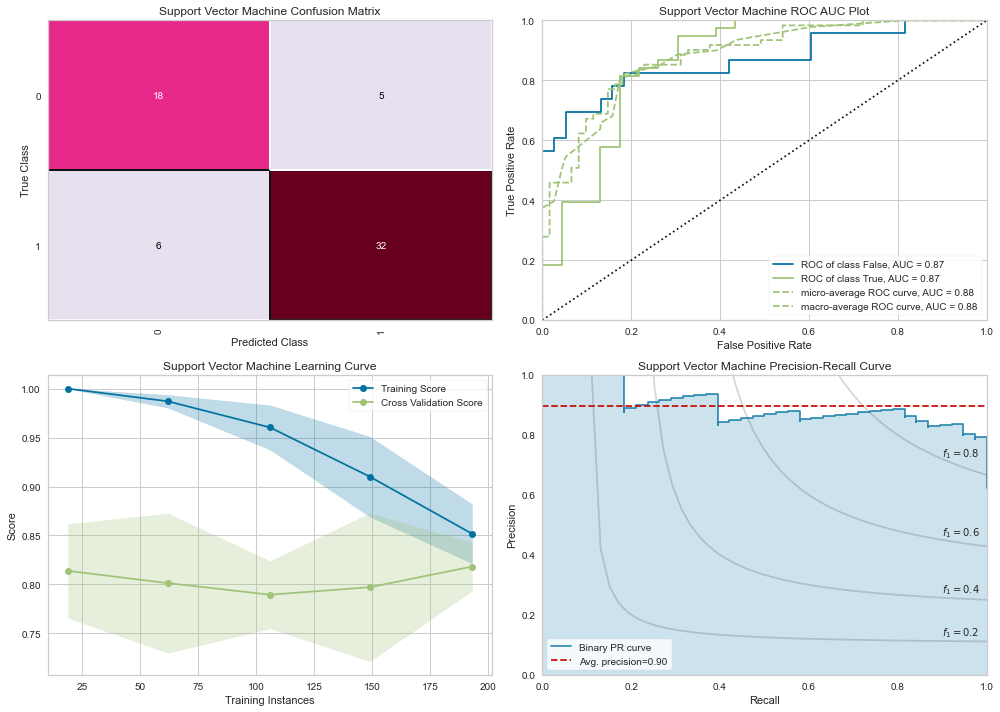

In [32]:
# --- Applying SVM ---
SVMclassifier = SVC(kernel='linear', max_iter=1000, C=10, probability=True)
SVMclassifier.fit(X_train, y_train)

y_pred_SVM = SVMclassifier.predict(X_test)
# --- SVM Accuracy ---
SVMAcc = accuracy_score(y_pred_SVM, y_test)
print('.:. Support Vector Machine Accuracy:'+'\033[1m {:.2f}%'.format(SVMAcc*100)+' .:.')

# --- SVM Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_SVM))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- SVM Confusion Matrix ---
svmmatrix = ConfusionMatrix(SVMclassifier, ax=ax1, cmap='PuRd',
                            title='Support Vector Machine Confusion Matrix')
svmmatrix.fit(X_train, y_train)
svmmatrix.score(X_test, y_test)
svmmatrix.finalize()

# --- SVM ROC AUC ---
svmrocauc = ROCAUC(SVMclassifier, classes=['False', 'True'], ax=ax2,
                   title='Support Vector Machine ROC AUC Plot')
svmrocauc.fit(X_train, y_train)
svmrocauc.score(X_test, y_test)
svmrocauc.finalize()

# --- SVM Learning Curve ---
svmlc = LearningCurve(SVMclassifier, ax=ax3, title='Support Vector Machine Learning Curve')
svmlc.fit(X_train, y_train)
svmlc.finalize()

# --- SVM Precision Recall Curve ---
svmcurve = PrecisionRecallCurve(SVMclassifier, ax=ax4, ap_score=True, iso_f1_curves=True,
                                title='Support Vector Machine Precision-Recall Curve')
svmcurve.fit(X_train, y_train)
svmcurve.score(X_test, y_test)
svmcurve.finalize()

plt.tight_layout();

.:. Gaussian Naive Bayes Accuracy: 83.61% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.81      0.74      0.77        23
           1       0.85      0.89      0.87        38

    accuracy                           0.84        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.84      0.83        61


.: Performance Evaluation
**************************


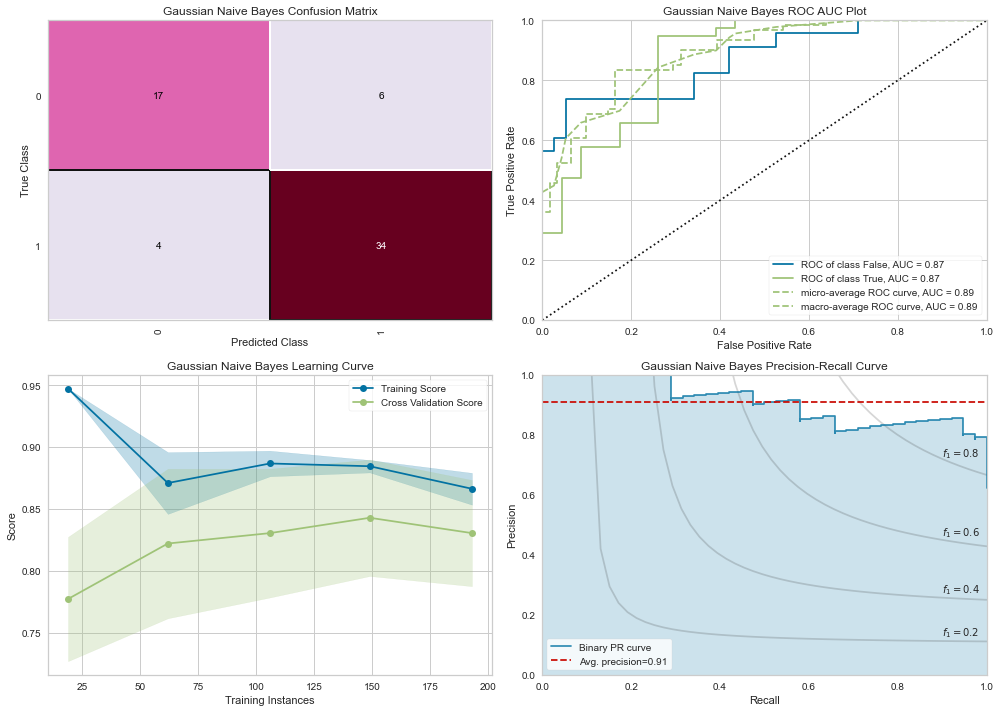

In [33]:
# --- Applying Gaussian NB ---
GNBclassifier = GaussianNB(var_smoothing=0.1)
GNBclassifier.fit(X_train, y_train)

y_pred_GNB = GNBclassifier.predict(X_test)
# --- GNB Accuracy ---
GNBAcc = accuracy_score(y_pred_GNB, y_test)
print('.:. Gaussian Naive Bayes Accuracy:'+'\033[1m {:.2f}%'.format(GNBAcc*100)+' .:.')

# --- GNB Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_GNB))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- GNB Confusion Matrix ---
gnbmatrix = ConfusionMatrix(GNBclassifier, ax=ax1, cmap='PuRd',
                            title='Gaussian Naive Bayes Confusion Matrix')
gnbmatrix.fit(X_train, y_train)
gnbmatrix.score(X_test, y_test)
gnbmatrix.finalize()

# --- GNB ROC AUC ---
gnbrocauc = ROCAUC(GNBclassifier, classes=['False', 'True'], ax=ax2,
                   title='Gaussian Naive Bayes ROC AUC Plot')
gnbrocauc.fit(X_train, y_train)
gnbrocauc.score(X_test, y_test)
gnbrocauc.finalize()

# --- GNB Learning Curve ---
gnblc = LearningCurve(GNBclassifier, ax=ax3, title='Gaussian Naive Bayes Learning Curve')
gnblc.fit(X_train, y_train)
gnblc.finalize()

# --- GNB Precision Recall Curve ---
gnbcurve = PrecisionRecallCurve(GNBclassifier, ax=ax4, ap_score=True, iso_f1_curves=True,
                                title='Gaussian Naive Bayes Precision-Recall Curve')
gnbcurve.fit(X_train, y_train)
gnbcurve.score(X_test, y_test)
gnbcurve.finalize()

plt.tight_layout();

.:. Decision Tree Accuracy: 75.41% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.63      0.83      0.72        23
           1       0.87      0.71      0.78        38

    accuracy                           0.75        61
   macro avg       0.75      0.77      0.75        61
weighted avg       0.78      0.75      0.76        61


.: Performance Evaluation
**************************


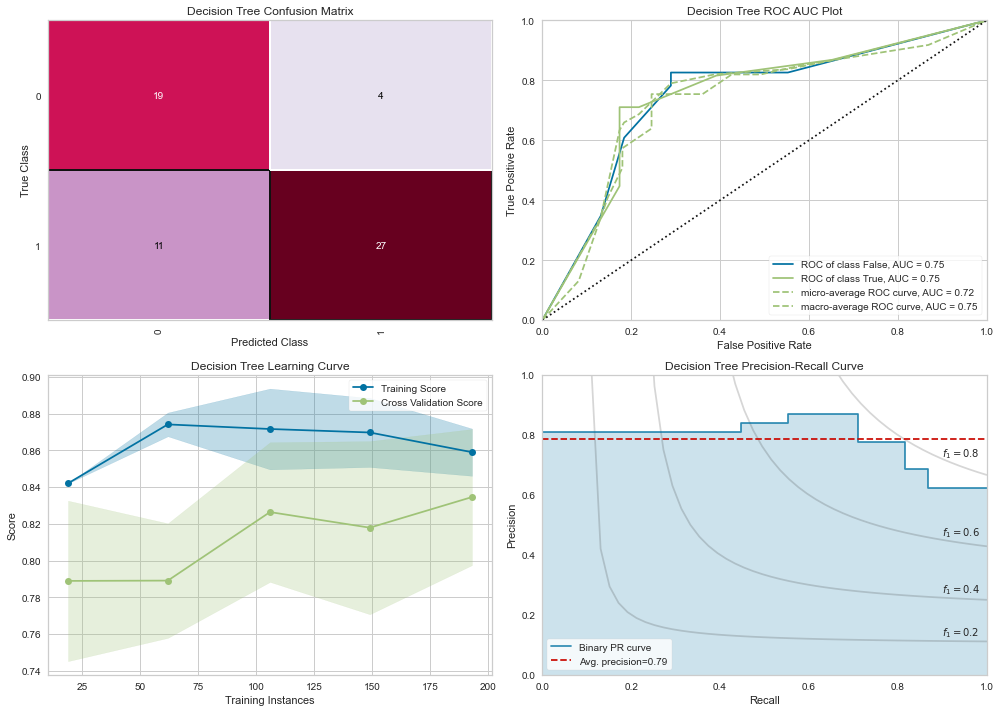

In [34]:
# --- Applying Decision Tree ---
DTCclassifier = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, criterion='entropy', min_samples_split=5,
                                       splitter='random', random_state=1)

DTCclassifier.fit(X_train, y_train)
y_pred_DTC = DTCclassifier.predict(X_test)
# --- Decision Tree Accuracy ---
DTCAcc = accuracy_score(y_pred_DTC, y_test)
print('.:. Decision Tree Accuracy:'+'\033[1m {:.2f}%'.format(DTCAcc*100)+' .:.')

# --- Decision Tree Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_DTC))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- Decision Tree Confusion Matrix ---
dtcmatrix = ConfusionMatrix(DTCclassifier, ax=ax1, cmap='PuRd',
                            title='Decision Tree Confusion Matrix')
dtcmatrix.fit(X_train, y_train)
dtcmatrix.score(X_test, y_test)
dtcmatrix.finalize()

# --- Decision Tree ROC AUC ---
dtcrocauc = ROCAUC(DTCclassifier, classes=['False', 'True'], ax=ax2,
                   title='Decision Tree ROC AUC Plot')
dtcrocauc.fit(X_train, y_train)
dtcrocauc.score(X_test, y_test)
dtcrocauc.finalize()

# --- Decision Tree Learning Curve ---
dtclc = LearningCurve(DTCclassifier, ax=ax3, title='Decision Tree Learning Curve')
dtclc.fit(X_train, y_train)
dtclc.finalize()

# --- Decision Tree Precision Recall Curve ---
dtccurve = PrecisionRecallCurve(DTCclassifier, ax=ax4, ap_score=True, iso_f1_curves=True, 
                                title='Decision Tree Precision-Recall Curve')
dtccurve.fit(X_train, y_train)
dtccurve.score(X_test, y_test)
dtccurve.finalize()

plt.tight_layout();

.:. Random Forest Accuracy: 77.05% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.67      0.78      0.72        23
           1       0.85      0.76      0.81        38

    accuracy                           0.77        61
   macro avg       0.76      0.77      0.76        61
weighted avg       0.78      0.77      0.77        61


.: Performance Evaluation
**************************


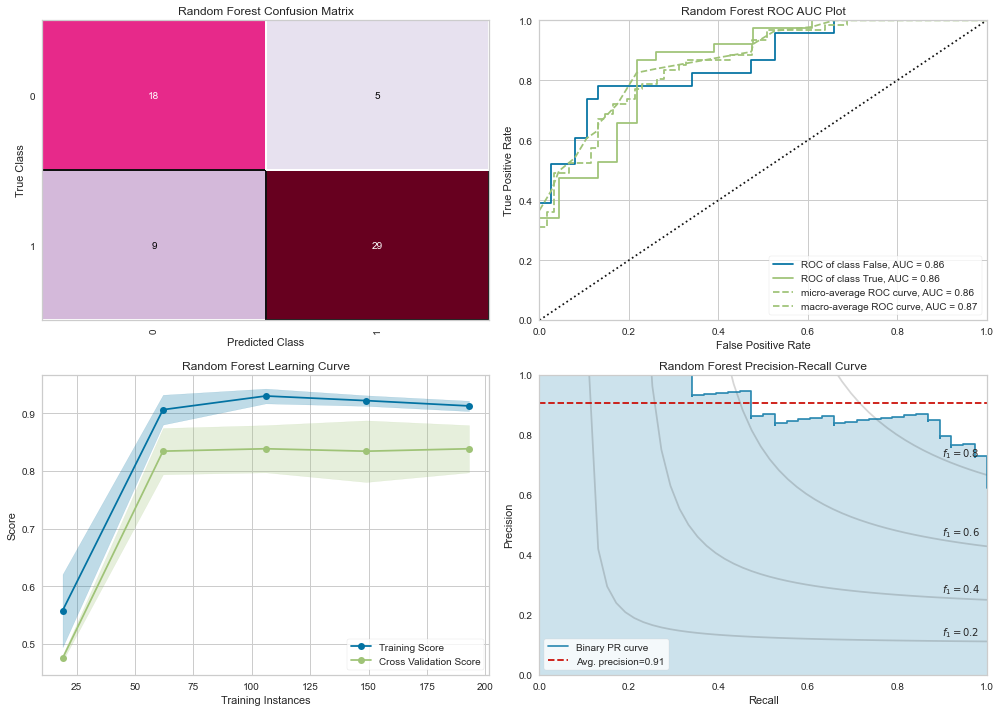

In [35]:
# --- Applying Random Forest ---
RFclassifier = RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=20, min_samples_split=15)

RFclassifier.fit(X_train, y_train)
y_pred_RF = RFclassifier.predict(X_test)
# --- Random Forest Accuracy ---
RFAcc = accuracy_score(y_pred_RF, y_test)
print('.:. Random Forest Accuracy:'+'\033[1m {:.2f}%'.format(RFAcc*100)+' .:.')

# --- Random FOrest Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_RF))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- Random Forest Confusion Matrix ---
rfcmatrix = ConfusionMatrix(RFclassifier, ax=ax1, cmap='PuRd',
                            title='Random Forest Confusion Matrix')
rfcmatrix.fit(X_train, y_train)
rfcmatrix.score(X_test, y_test)
rfcmatrix.finalize()

# --- Random Forest ROC AUC ---
rccrocauc = ROCAUC(RFclassifier, classes=['False', 'True'], ax=ax2,
                   title='Random Forest ROC AUC Plot')
rccrocauc.fit(X_train, y_train)
rccrocauc.score(X_test, y_test)
rccrocauc.finalize()

# --- Random Forest Learning Curve ---
rcclc = LearningCurve(RFclassifier, ax=ax3, title='Random Forest Learning Curve')
rcclc.fit(X_train, y_train)
rcclc.finalize()

# --- Random Forest Precision Recall Curve ---
rcccurve = PrecisionRecallCurve(RFclassifier, ax=ax4, ap_score=True, iso_f1_curves=True, 
                                title='Random Forest Precision-Recall Curve')
rcccurve.fit(X_train, y_train)
rcccurve.score(X_test, y_test)
rcccurve.finalize()

plt.tight_layout();


.:. Gradient Boosting Accuracy: 81.97% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.75      0.78      0.77        23
           1       0.86      0.84      0.85        38

    accuracy                           0.82        61
   macro avg       0.81      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61


.: Performance Evaluation
**************************


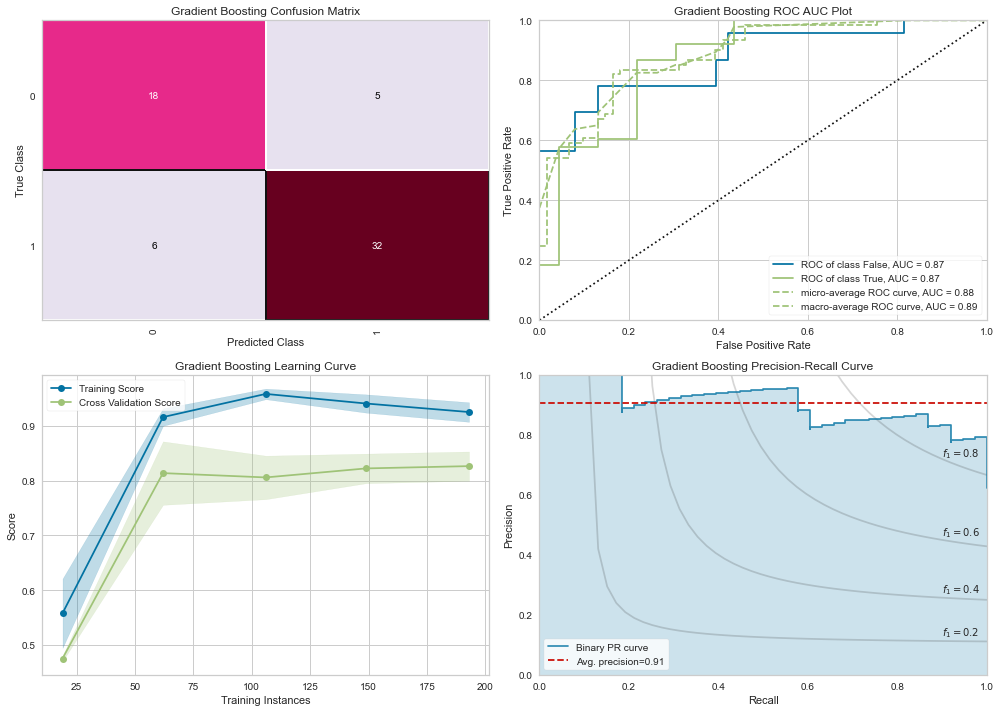

In [36]:
# --- Applying Gradient Boosting ---
GBclassifier = GradientBoostingClassifier(random_state=1, n_estimators=100, max_leaf_nodes=3, loss='exponential', 
                                          min_samples_leaf=20)

GBclassifier.fit(X_train, y_train)
y_pred_GB = GBclassifier.predict(X_test)
# --- Gradient Boosting Accuracy ---
GBAcc = accuracy_score(y_pred_GB, y_test)
print('.:. Gradient Boosting Accuracy:'+'\033[1m {:.2f}%'.format(GBAcc*100)+' .:.')

# --- Gradient Boosting Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_GB))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- Gradient Boosting Confusion Matrix ---
gbcmatrix = ConfusionMatrix(GBclassifier, ax=ax1, cmap='PuRd',
                            title='Gradient Boosting Confusion Matrix')
gbcmatrix.fit(X_train, y_train)
gbcmatrix.score(X_test, y_test)
gbcmatrix.finalize()

# --- Gradient Boosting ROC AUC ---
gbcrocauc = ROCAUC(GBclassifier, classes=['False', 'True'], ax=ax2,
                   title='Gradient Boosting ROC AUC Plot')
gbcrocauc.fit(X_train, y_train)
gbcrocauc.score(X_test, y_test)
gbcrocauc.finalize()

# --- Gradient Boosting Learning Curve ---
gbclc = LearningCurve(GBclassifier, ax=ax3, title='Gradient Boosting Learning Curve')
gbclc.fit(X_train, y_train)
gbclc.finalize()

# --- Gradient Boosting Precision Recall Curve ---
gbcurve = PrecisionRecallCurve(GBclassifier, ax=ax4, ap_score=True, iso_f1_curves=True, 
                                title='Gradient Boosting Precision-Recall Curve')
gbcurve.fit(X_train, y_train)
gbcurve.score(X_test, y_test)
gbcurve.finalize()

plt.tight_layout();

.:. AdaBoost Accuracy: 86.89% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        23
           1       0.89      0.89      0.89        38

    accuracy                           0.87        61
   macro avg       0.86      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61


.: Performance Evaluation
**************************


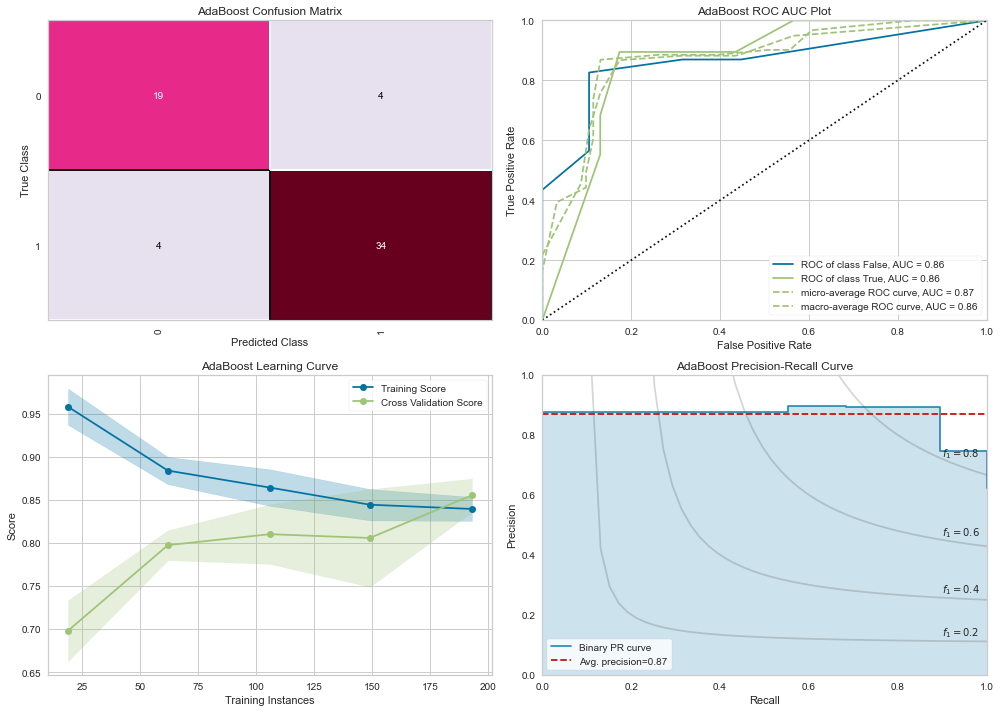

In [37]:
# --- Applying AdaBoost ---
ABclassifier = AdaBoostClassifier(n_estimators=3)

ABclassifier.fit(X_train, y_train)
y_pred_AB = ABclassifier.predict(X_test)
# --- AdaBoost Accuracy ---
ABAcc = accuracy_score(y_pred_AB, y_test)
print('.:. AdaBoost Accuracy:'+'\033[1m {:.2f}%'.format(ABAcc*100)+' .:.')

# --- AdaBoost Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_AB))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- AdaBoost Confusion Matrix ---
abcmatrix = ConfusionMatrix(ABclassifier, ax=ax1, cmap='PuRd',
                            title='AdaBoost Confusion Matrix')
abcmatrix.fit(X_train, y_train)
abcmatrix.score(X_test, y_test)
abcmatrix.finalize()

# --- AdaBoost ROC AUC ---
abrocauc = ROCAUC(ABclassifier, classes=['False', 'True'], ax=ax2,
                  title='AdaBoost ROC AUC Plot')
abrocauc.fit(X_train, y_train)
abrocauc.score(X_test, y_test)
abrocauc.finalize()

# --- AdaBoost Learning Curve ---
ablc = LearningCurve(ABclassifier, ax=ax3, title='AdaBoost Learning Curve')
ablc.fit(X_train, y_train)
ablc.finalize()

# --- AdaBoost Precision Recall Curve ---
abpc = PrecisionRecallCurve(ABclassifier, ax=ax4, ap_score=True, iso_f1_curves=True, 
                            title='AdaBoost Precision-Recall Curve')
abpc.fit(X_train, y_train)
abpc.score(X_test, y_test)
abpc.finalize()

plt.tight_layout();


In [38]:
# --- Create Accuracy Comparison Table ---
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K-Nearest Neighbour', 'Support Vector Machine', 
                                  'Gaussian Naive Bayes', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 
                                  'AdaBoost'], 
                        'Accuracy': [LRAcc*100, KNNAcc*100, SVMAcc*100, GNBAcc*100, DTCAcc*100, RFAcc*100, GBAcc*100, 
                                     ABAcc*100]})

# --- Create Accuracy Comparison Table ---
compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='PuRd').hide_index().set_properties(**{'font-family': 'Segoe UI'})

Model,Accuracy
AdaBoost,86.885246
Gaussian Naive Bayes,83.606557
Support Vector Machine,81.967213
Gradient Boosting,81.967213
Logistic Regression,78.688525
K-Nearest Neighbour,78.688525
Random Forest,77.049180
Decision Tree,75.409836


In [40]:
# --- Transform Test Set & Prediction into New Data Frame ---
test = pd.DataFrame(X_test, columns=['age_scaled', 'sex', 'trestbps_scaled', 
                                     'chol_scaled', 'fbs', 'restecg_scaled', 
                                     'thalach_scaled', 'exang', 'oldpeak_scaled', 
                                     'ca_scaled', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 
                                     'thal_0', 'thal_1', 'thal_2', 'thal_3',
                                     'slope_0', 'slope_1', 'slope_2','cp_0','thal_0', 'slope_0', 'thal_3', 'thal_1', 'thal_2'])
pred = pd.DataFrame(y_pred_AB, columns=['target'])
prediction = pd.concat([test, pred], axis=1, join='inner')
print(prediction)

# # --- Transforming 'cp' Column ---
# prediction['cp_0'] = prediction['cp_0'].replace([1, 0],['0',''])
# prediction['cp_1'] = prediction['cp_1'].replace([1, 0],['1', ''])
# prediction['cp_2'] = prediction['cp_2'].replace([1, 0],['2', ''])
# prediction['cp_3'] = prediction['cp_3'].replace([1, 0],['3', ''])

# prediction['cp_0'] = np.where((prediction['cp_0'] == ''), prediction['cp_1'], prediction['cp_0'])
# prediction['cp_0'] = np.where((prediction['cp_0'] == ''), prediction['cp_2'], prediction['cp_0'])
# prediction['cp_0'] = np.where((prediction['cp_0'] == ''), prediction['cp_3'], prediction['cp_0'])

# # --- Transforming 'thal' Column ---
# prediction['thal_0'] = prediction['thal_0'].replace([1, 0],['0',''])
# prediction['thal_1'] = prediction['thal_1'].replace([1, 0],['1', ''])
# prediction['thal_2'] = prediction['thal_2'].replace([1, 0],['2', ''])
# prediction['thal_3'] = prediction['thal_3'].replace([1, 0],['3', ''])

# prediction['thal_0'] = np.where((prediction['thal_0'] == ''), prediction['thal_1'], prediction['thal_0'])
# prediction['thal_0'] = np.where((prediction['thal_0'] == ''), prediction['thal_2'], prediction['thal_0'])
# prediction['thal_0'] = np.where((prediction['thal_0'] == ''), prediction['thal_3'], prediction['thal_0'])

# # --- Transforming 'slope' Column ---
# prediction['slope_0'] = prediction['slope_0'].replace([1, 0],['0',''])
# prediction['slope_1'] = prediction['slope_1'].replace([1, 0],['1', ''])
# prediction['slope_2'] = prediction['slope_2'].replace([1, 0],['2', ''])

# prediction['slope_0'] = np.where((prediction['slope_0'] == ''), prediction['slope_1'], prediction['slope_0'])
# prediction['slope_0'] = np.where((prediction['slope_0'] == ''), prediction['slope_2'], prediction['slope_0'])

# # --- Drop Unnecessary ---
# prediction = prediction.drop(['cp_1', 'cp_2', 'cp_3', 'thal_1', 'thal_2', 'thal_3',
#                  'slope_1', 'slope_2'], axis = 1)

# --- Rename Column Names ---
new_name = {'cp_0': 'cp', 'thal_0': 'thal', 'slope_0': 'slope'}
prediction.rename(columns=new_name, inplace=True)

# --- Display Prediction Result ---
prediction.head().style.background_gradient(cmap='Reds').hide_index().set_properties(**{'font-family': 'Segoe UI'});

    age_scaled       sex  trestbps_scaled  chol_scaled       fbs  \
0     1.320442  0.520416         0.453924     0.586555  2.132007   
1     0.297984  0.520416        -0.648750    -1.055739 -0.469042   
2    -0.497261  0.520416        -0.648750    -1.148003 -0.469042   
3     0.638803  0.520416         0.576444    -0.539062 -0.469042   
4     1.320442 -1.921538         0.576444     3.077677  2.132007   
..         ...       ...              ...          ...       ...   
56    0.979623  0.520416        -0.648750     0.568103 -0.469042   
57   -2.769390  0.520416        -0.036153    -0.852759 -0.469042   
58   -0.042835  0.520416        -0.036153    -0.981928  2.132007   
59    1.434049  0.520416         1.801637    -0.409893 -0.469042   
60    0.525197  0.520416        -0.648750     0.623461 -0.469042   

    restecg_scaled  thalach_scaled     exang  oldpeak_scaled  ca_scaled  ...  \
0         0.969724       -0.724569  0.610565       -0.833333  -0.545777  ...   
1         0.467361     

In [41]:
# --- Export Prediction Result into csv File ---
prediction.to_csv('prediction_heart_disease_caesarmario.csv', index=False)

In [42]:
# --- Export Pickle File ---
import pickle
file = open('heart_disease_AB_caesarmario.pkl', 'wb')
pickle.dump(ABclassifier, file)

In [43]:
# --- Turn Information into List ---
data = [[0.254, 1, 0.487, 0.362,   ## age_scaled, sex, trestbps_scaled, chol
         1, 0.5, 0.641, 1,         ## fbs, restecg_scaled, thalach_scaled, exang
         0.672, 0.863, 0, 0,       ## oldpeak_scaled, ca_scaled, cp_0, cp_1
         0, 1, 0, 0,               ## cp_2, cp_3, thal_0, thal_1
         0, 1, 0, 1, 0,1,
         0,1, 0,1,0]]           ## thal_2, thal_3, slope_0, slope_1, slope_2

# --- Prediction using Gradient Boosting ---
result = ABclassifier.predict(data)

# --- Print Heart Disease Status ---
if result[0] == 1:
  print('\033[1m' + '.:. Heart Disease Detected!.:.' + '\033[0m')
else:
  print('\033[1m' + '.:. Heart Disease Not Detected!.:.' + '\033[0m')

.:. Heart Disease Detected!.:.
